In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.model_selection import train_test_split
# from xgboost import XGBRegressor  # Correct import for XGBRegressor
# from statsmodels.tsa.arima.model import ARIMA  # Updated import for ARIMA
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LSTM
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset from a CSV file
# Assuming the CSV file is named 'sales_data.csv'
training_data = pd.read_csv(r'C:\Users\MSI 11uc\Documents\ML\CW\Q5_sales_forecasting\data\raw\training_data.csv')
test_data = pd.read_csv(r'C:\Users\MSI 11uc\Documents\ML\CW\Q5_sales_forecasting\data\raw\test_data.csv')

In [7]:
training_data.shape

(614098, 7)

In [ ]:
# combined_data_df = pd.concat([pre_training_data,pre_test_data])
# combined_data_df.to_csv(r"C:\Users\MSI 11uc\Documents\ML\CW\Q5_sales_forecasting\data\processed\combined_train_test.csv",index=False)

In [ ]:
# Examine the structure of the dataset
print(training_data.info())
print(training_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614098 entries, 0 to 614097
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date_id      614098 non-null  object 
 1   item_dept    614098 non-null  object 
 2   item_qty     614098 non-null  float64
 3   net_sales    614098 non-null  float64
 4   store        614098 non-null  object 
 5   item         614098 non-null  int64  
 6   invoice_num  591288 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 32.8+ MB
None
     date_id  item_dept  item_qty  net_sales store    item  invoice_num
0  11/1/2021    Grocery       1.0      160.0   XYZ   16620    1475459.0
1  11/1/2021    Grocery       2.0      480.0   XYZ   32365    1475459.0
2  11/1/2021    Grocery       1.0      127.0   XYZ   31349    1475459.0
3  11/1/2021  Household       2.0      110.0   XYZ    1266    1475475.0
4  11/1/2021  Household       1.0      150.0   XYZ  114920    1475475.0


In [ ]:
print(training_data.describe())


            item_qty      net_sales          item   invoice_num
count  614098.000000  614098.000000  614098.00000  5.912880e+05
mean        1.533792     335.067969   67622.41479  4.231954e+06
std         3.058092     824.733169   48909.65677  1.704178e+06
min       -59.000000  -15250.000000     906.00000  1.475419e+06
25%         1.000000     124.000000   14340.00000  2.581947e+06
50%         1.000000     215.000000   89725.00000  4.597865e+06
75%         1.668000     371.000000  117021.00000  5.598286e+06
max       880.000000  316880.280000  124146.00000  9.354809e+06


In [ ]:
# Grouping by store and department to get mean, median, and standard deviation of sales
summary_stats = training_data.groupby(['store', 'item_dept'])['net_sales'].agg(['mean', 'median', 'std']).reset_index()
print(summary_stats)

  store  item_dept        mean  median          std
0   ABC  Beverages  441.975939  290.00   719.469928
1   ABC    Grocery  347.082976  203.99  1439.693282
2   ABC  Household  355.436507  230.00   520.681300
3   XYZ  Beverages  382.585788  280.00   454.331200
4   XYZ    Grocery  286.437907  195.52   481.431256
5   XYZ  Household  298.729242  204.00   390.895026


In [ ]:
# Sales statistics by date
date_stats = training_data.groupby('date_id')['net_sales'].agg(['mean', 'median', 'std']).reset_index()
print(date_stats)

      date_id        mean  median         std
0    1/1/2022  315.964525  215.00  397.381885
1   1/10/2022  339.473565  220.00  535.510083
2   1/11/2022  376.790450  230.00  710.686714
3   1/12/2022  318.288749  220.00  357.604731
4   1/13/2022  335.934474  215.45  470.089396
..        ...         ...     ...         ...
87  12/5/2021  329.566704  221.00  364.061167
88  12/6/2021  313.799122  207.90  368.463812
89  12/7/2021  295.281183  200.00  333.654962
90  12/8/2021  339.352103  220.00  406.464879
91  12/9/2021  324.655081  220.00  432.573577

[92 rows x 4 columns]


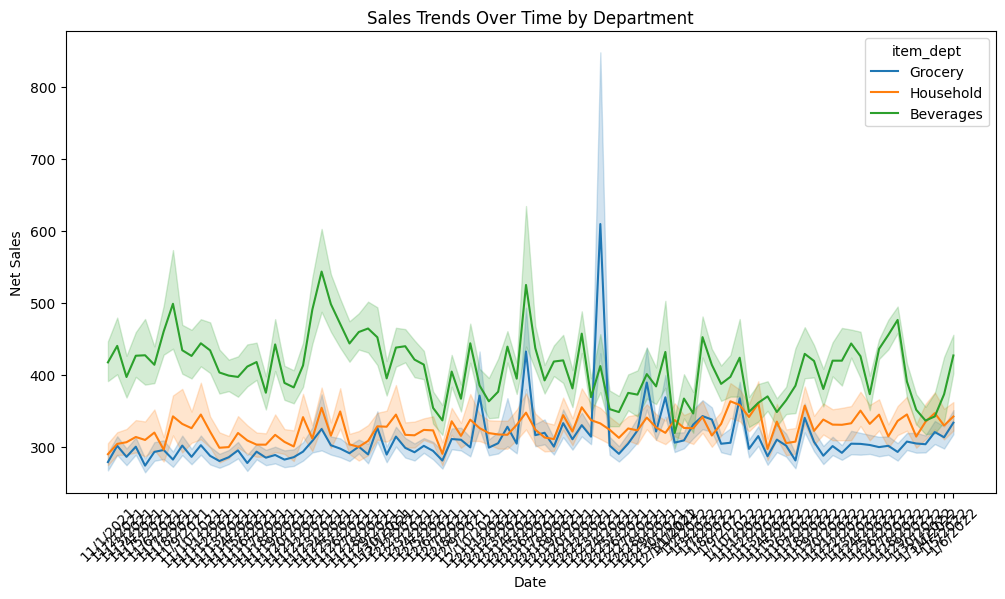

In [ ]:
# Time series plot for sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=training_data, x='date_id', y='net_sales', hue='item_dept')
plt.title('Sales Trends Over Time by Department')
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.xticks(rotation=45)
plt.show() 

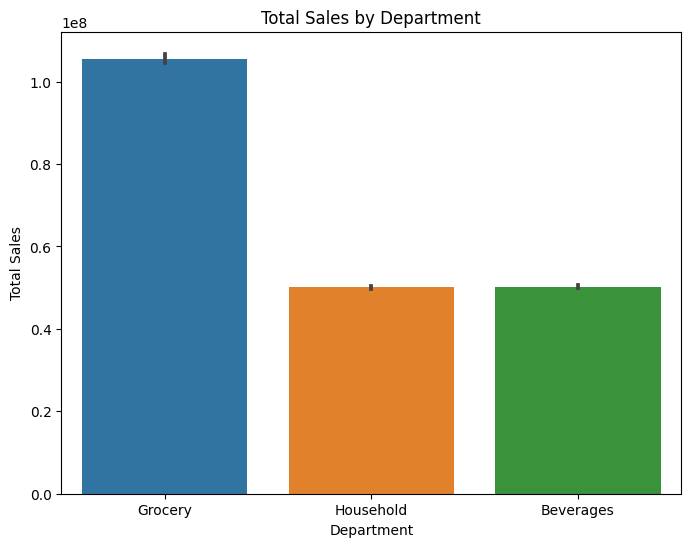

In [ ]:
# Bar plot for total sales by department
plt.figure(figsize=(8, 6))
sns.barplot(data=training_data, x='item_dept', y='net_sales', estimator=sum)
plt.title('Total Sales by Department')
plt.xlabel('Department')
plt.ylabel('Total Sales')
plt.show()

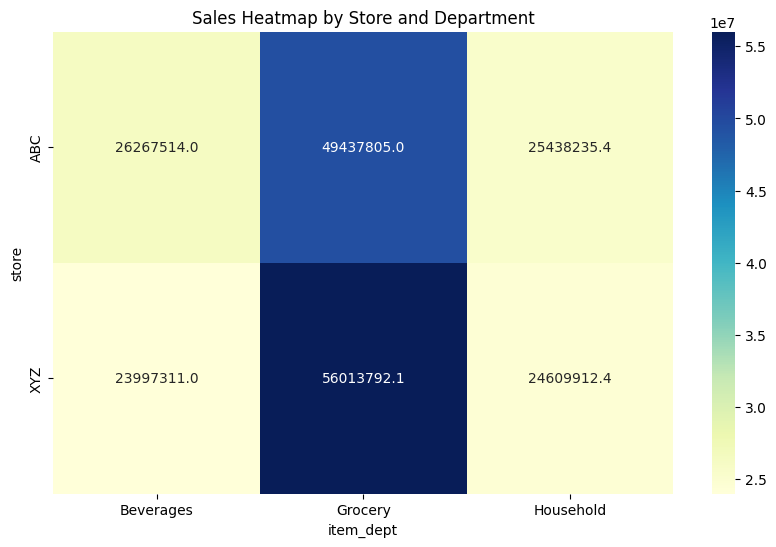

In [ ]:
# Heatmap for sales across stores and departments
pivot_table = training_data.pivot_table(values='net_sales', index='store', columns='item_dept', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Sales Heatmap by Store and Department')
plt.show()

<h3>Actual Preprocessing</h3>

day_of_week
Monday       2.740170e+07
Tuesday      2.748833e+07
Wednesday    2.746814e+07
Thursday     3.014797e+07
Friday       3.278485e+07
Saturday     3.006873e+07
Sunday       3.040485e+07
Name: net_sales, dtype: float64


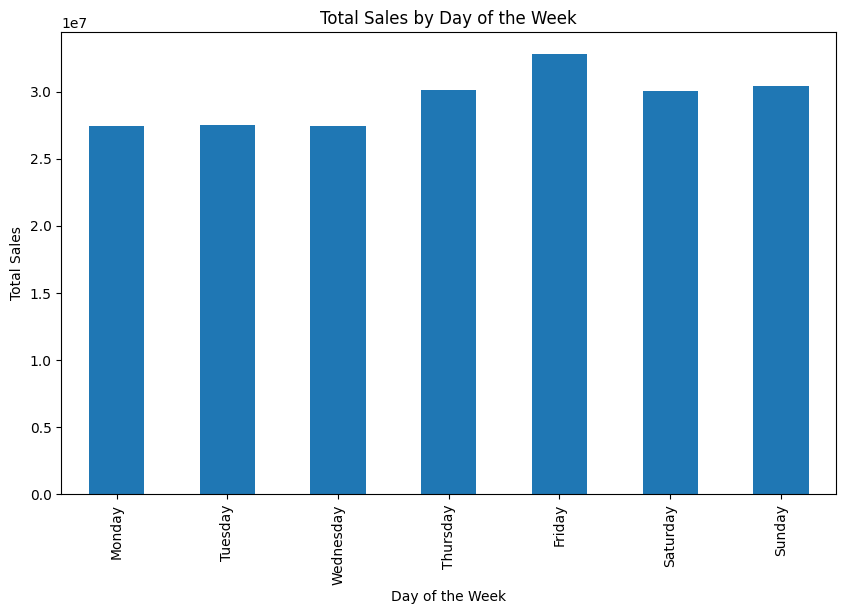

In [ ]:
# Convert date_id to datetime format
training_data['date_id'] = pd.to_datetime(training_data['date_id'])

# Add a new column for the day of the week
training_data['day_of_week'] = training_data['date_id'].dt.day_name()

# Group by day of the week to analyze sales patterns
weekday_sales = training_data.groupby('day_of_week')['net_sales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print(weekday_sales)

# Plotting the sales pattern over the week
plt.figure(figsize=(10, 6))
weekday_sales.plot(kind='bar')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
# Check for duplicate rows
duplicate_rows = training_data[training_data.duplicated()]

# Print the duplicate rows, if any
print(f"Number of rows: {training_data.shape[0]}")
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of rows: 614098
Number of duplicate rows: 1766


In [ ]:
# Drop duplicate rows
training_data = training_data.drop_duplicates()

In [ ]:
# Check for missing values
print(training_data.isnull().sum())

date_id            0
item_dept          0
item_qty           0
net_sales          0
store              0
item               0
invoice_num    21427
day_of_week        0
dtype: int64


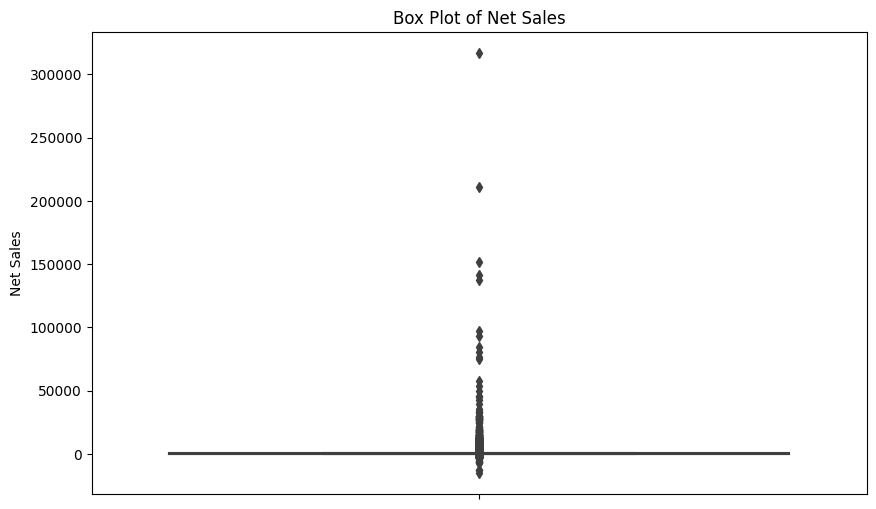

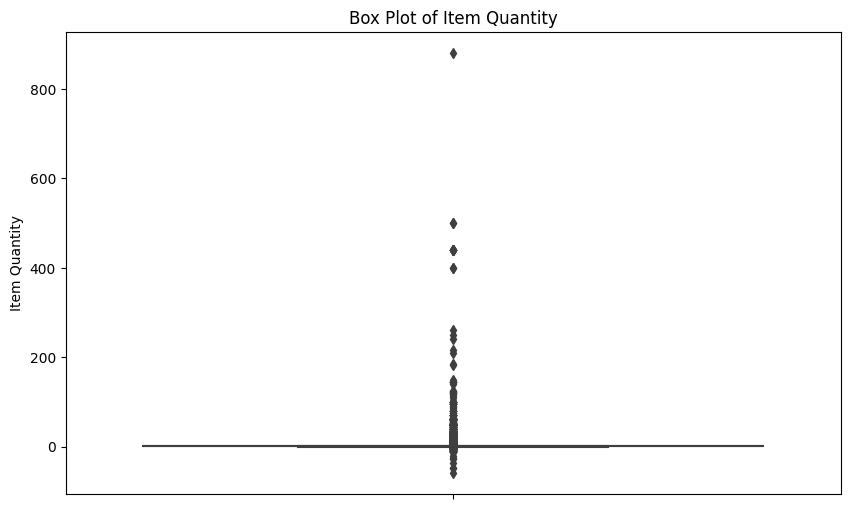

In [ ]:
# Box plot for 'net_sales'
plt.figure(figsize=(10, 6))
sns.boxplot(y=training_data['net_sales'])
plt.title('Box Plot of Net Sales')
plt.ylabel('Net Sales')
plt.show()

# Box plot for 'item_qty'
plt.figure(figsize=(10, 6))
sns.boxplot(y=training_data['item_qty'])
plt.title('Box Plot of Item Quantity')
plt.ylabel('Item Quantity')
plt.show()

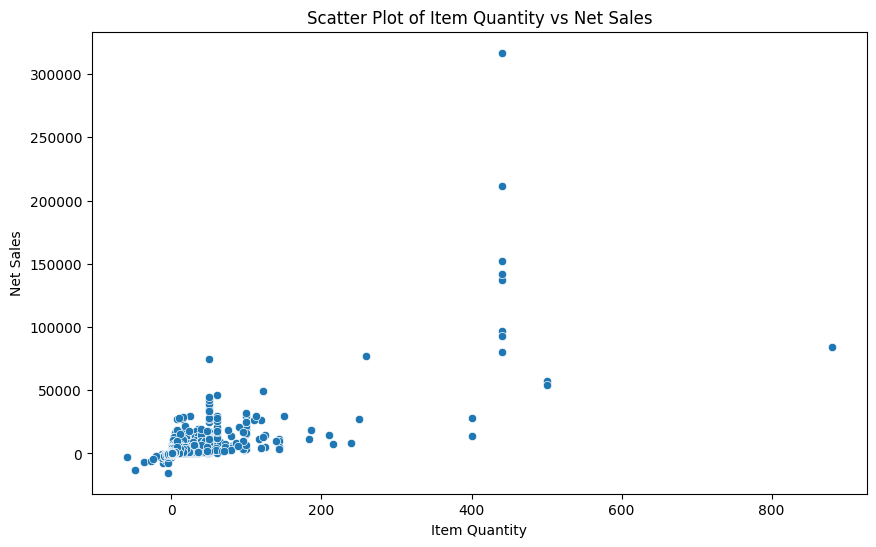

In [ ]:
# Scatter plot for 'item_qty' vs 'net_sales'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=training_data['item_qty'], y=training_data['net_sales'])
plt.title('Scatter Plot of Item Quantity vs Net Sales')
plt.xlabel('Item Quantity')
plt.ylabel('Net Sales')
plt.show()

In [ ]:
# Removing the outliers
training_data = training_data[training_data['net_sales'] < 300000]
training_data = training_data[training_data['item_qty'] < 800]

print(f"Number of rows: {training_data.shape[0]}")


Number of rows: 612330


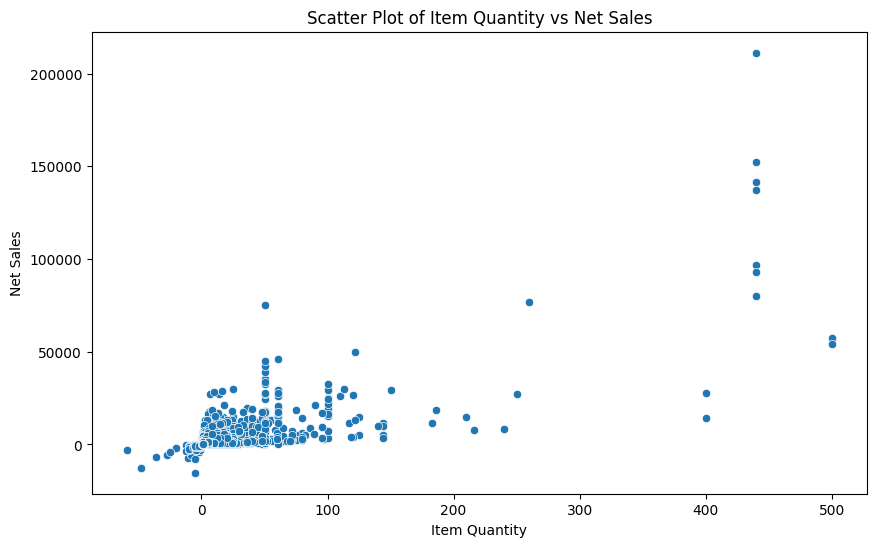

In [ ]:
# Scatter plot for 'item_qty' vs 'net_sales'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=training_data['item_qty'], y=training_data['net_sales'])
plt.title('Scatter Plot of Item Quantity vs Net Sales')
plt.xlabel('Item Quantity')
plt.ylabel('Net Sales')
plt.show()

In [ ]:
# training_data.to_csv(r"C:\Users\MSI 11uc\Documents\ML\CW\Q5_sales_forecasting\data\processed\train.csv",index=False)